In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# Lendo dataset
df = pd.read_csv("breast_cancer_.csv");

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0,0


In [4]:
# Ferivicação de valores faltantes por atributo
df_nan = df.isna().sum()

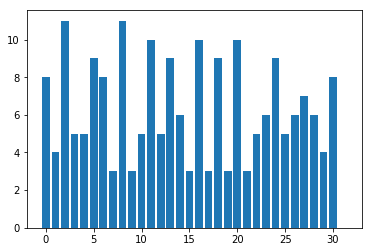

In [42]:
# Grafico dos valores faltantes por atributo
plt.bar(range(0,32),df_nan);

In [103]:
# Aplicando o calor medio da caluna para os atribulos faltantes
df = df.fillna(np.mean(df,axis=0))

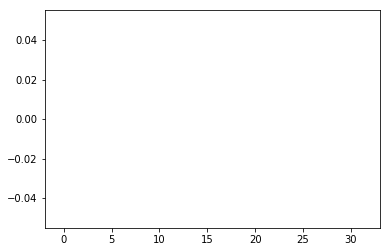

In [56]:
# Todos os valores faltantes foram preenchidos 
plt.bar(range(0,32),df.isna().sum());

In [58]:
from sklearn.model_selection import train_test_split

In [104]:
# Separando atributos das classes
X = df.values[:,:-1]
y = df.values[:, -1]

In [105]:
# Dividindo o data sete em treino e teste com a funcao train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [72]:
# Para a padronização dos atributos, foi escolhida a stantartização. 
# Essa tecnica de padronização se moutro mais eficiente em praticas anteriores

In [65]:
from sklearn.preprocessing import StandardScaler

In [68]:
std = StandardScaler()

In [106]:
# Standatizando os atributos
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)
X_train_val = std.fit_transform(X_train_val)
X_val = std.transform(X_val)

In [125]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [100]:
Dtrees = {"DTC1": DecisionTreeClassifier(criterion='entropy', max_depth=3),
          "DTC2": DecisionTreeClassifier(criterion='entropy', max_depth=5),
          "DTC3": DecisionTreeClassifier(criterion='entropy', max_depth=7)
         }

In [113]:
# scoresDT = {}
# kf = KFold(n_splits=3)
# for dtc in Dtrees:
#     scores = cross_val_score(Dtrees[dtc], X_train_val, y_train_val, cv=kf)
#     scoresRF[dtc] = np.mean(scores) 
#     print(dtc, scoresRF[dtc])

DTC1 0.9926828395591812
DTC2 0.9853477887505367
DTC3 0.9926828395591812


In [108]:
Randons = {"RF1": RandomForestClassifier(n_estimators=50,max_depth=3),
           "RF2": RandomForestClassifier(n_estimators=50,max_depth=5),
           "RF3": RandomForestClassifier(n_estimators=50,max_depth=7),
           "RF4": RandomForestClassifier(n_estimators=100,max_depth=3),
           "RF5": RandomForestClassifier(n_estimators=100,max_depth=5),
           "RF6": RandomForestClassifier(n_estimators=100,max_depth=7),
           "RF7": RandomForestClassifier(n_estimators=200,max_depth=3),
           "RF8": RandomForestClassifier(n_estimators=200,max_depth=5),
           "RF9": RandomForestClassifier(n_estimators=200,max_depth=7)
         }

In [111]:
scoresRF = {}
kf = KFold(n_splits=3)
for rfc in Randons:
    scores = cross_val_score(Randons[rfc], X_train_val, y_train_val, cv=kf)
    scoresRF[rfc] = np.mean(scores)
    print(rfc, scoresRF[rfc])

RF1 0.9779948475740662
RF2 0.9926649491913554
RF3 0.9901960784313726
RF4 0.9877808787748675
RF5 0.9926649491913554
RF6 0.9828789179905538
RF7 0.9877808787748675
RF8 0.9877808787748675
RF9 0.9853298983827107


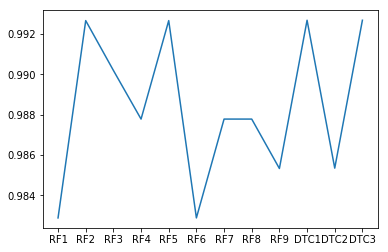

In [152]:
plt.plot(scoresRF.keys(),scoresRF.values())

In [124]:
kf = KFold(n_splits=3)
for dtc in Dtrees:
    for stim in [50,100,200]:
        bc = BaggingClassifier(base_estimator=Dtrees[dtc], n_estimators=stim)
        scores = cross_val_score(bc, X_train_val, y_train_val, cv=kf)
        print(dtc,'| Stimator:', stim,'| ACC:', np.mean(scores))

DTC1 | Stimator: 50 | ACC: 0.9950980392156863
DTC1 | Stimator: 100 | ACC: 0.9950980392156863
DTC1 | Stimator: 200 | ACC: 0.9950980392156863
DTC2 | Stimator: 50 | ACC: 0.9950980392156863
DTC2 | Stimator: 100 | ACC: 0.9950980392156863
DTC2 | Stimator: 200 | ACC: 0.9950980392156863
DTC3 | Stimator: 50 | ACC: 0.9950980392156863
DTC3 | Stimator: 100 | ACC: 0.9950980392156863
DTC3 | Stimator: 200 | ACC: 0.9950980392156863


In [ ]:
# Todas as execucoes da DecisionTree obtiveram a mesma acuracia, por tanto ficaremos com os hiper-paramentros 
# de menor tempo de execucao (criterion='entropy', max_depth=3)

In [122]:
# Com a maioria dos testes contendo a mesma acuracia, 
# foi escolhido os hiper-parametros para a RandomForest (n_stimators: 50, max_depth: 3) 
# e um n_stimators: 50 para o bagging pela velociade de execucao

In [133]:
GBoosts = {"GBC1": GradientBoostingClassifier(learning_rate=0.1,n_estimators=50,max_depth=3),
       "GBC2": GradientBoostingClassifier(learning_rate=0.1,n_estimators=50,max_depth=5),
       "GBC3": GradientBoostingClassifier(learning_rate=0.1,n_estimators=50,max_depth=7),
       "GBC4": GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=3),
       "GBC5": GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=5),
       "GBC6": GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=7),
       "GBC7": GradientBoostingClassifier(learning_rate=0.1,n_estimators=200,max_depth=3),
       "GBC8": GradientBoostingClassifier(learning_rate=0.1,n_estimators=200,max_depth=5),
       "GBC9": GradientBoostingClassifier(learning_rate=0.1,n_estimators=200,max_depth=7),
       "GBC10": GradientBoostingClassifier(learning_rate=0.01,n_estimators=50,max_depth=3),
       "GBC11": GradientBoostingClassifier(learning_rate=0.01,n_estimators=50,max_depth=5),
       "GBC12": GradientBoostingClassifier(learning_rate=0.01,n_estimators=50,max_depth=7),
       "GBC13": GradientBoostingClassifier(learning_rate=0.01,n_estimators=100,max_depth=3),
       "GBC14": GradientBoostingClassifier(learning_rate=0.01,n_estimators=100,max_depth=5),
       "GBC15": GradientBoostingClassifier(learning_rate=0.01,n_estimators=100,max_depth=7),
       "GBC16": GradientBoostingClassifier(learning_rate=0.01,n_estimators=200,max_depth=3),
       "GBC17": GradientBoostingClassifier(learning_rate=0.01,n_estimators=200,max_depth=5),
       "GBC18": GradientBoostingClassifier(learning_rate=0.01,n_estimators=200,max_depth=7),
       "GBC19": GradientBoostingClassifier(learning_rate=0.05,n_estimators=50,max_depth=3),
       "GBC20": GradientBoostingClassifier(learning_rate=0.05,n_estimators=50,max_depth=5),
       "GBC21": GradientBoostingClassifier(learning_rate=0.05,n_estimators=50,max_depth=7),
       "GBC22": GradientBoostingClassifier(learning_rate=0.05,n_estimators=100,max_depth=3),
       "GBC23": GradientBoostingClassifier(learning_rate=0.05,n_estimators=100,max_depth=5),
       "GBC24": GradientBoostingClassifier(learning_rate=0.05,n_estimators=100,max_depth=7),
       "GBC25": GradientBoostingClassifier(learning_rate=0.05,n_estimators=200,max_depth=3),
       "GBC26": GradientBoostingClassifier(learning_rate=0.05,n_estimators=200,max_depth=5),
       "GBC27": GradientBoostingClassifier(learning_rate=0.05,n_estimators=200,max_depth=7),
        }

In [137]:
scoresGB = {}
kf = KFold(n_splits=3)
for gbc in GBoosts:
    scores = cross_val_score(GBoosts[gbc], X_train_val, y_train_val, cv=kf)
    scoresGB[gbc] = np.mean(scores)
    print(gbc, np.mean(scores))

GBC1 0.9878166595105196
GBC2 0.9853656791183627
GBC3 0.9853656791183627
GBC4 0.9878166595105196
GBC5 0.9853656791183627
GBC6 0.9853656791183627
GBC7 0.9878166595105196
GBC8 0.9853656791183627
GBC9 0.9853656791183627
GBC10 0.9853656791183627
GBC11 0.9853656791183627
GBC12 0.9853656791183627
GBC13 0.9853656791183627
GBC14 0.9853656791183627
GBC15 0.9853656791183627
GBC16 0.9853656791183627
GBC17 0.9853656791183627
GBC18 0.9853656791183627
GBC19 0.9878166595105196
GBC20 0.9853656791183627
GBC21 0.9853656791183627
GBC22 0.9878166595105196
GBC23 0.9853656791183627
GBC24 0.9829325890940318
GBC25 0.9878166595105196
GBC26 0.9853656791183627
GBC27 0.9853656791183627


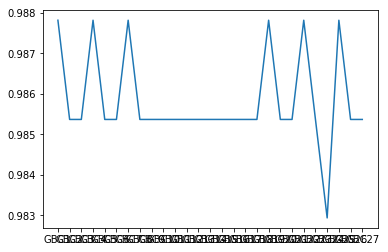

In [151]:
plt.plot(scoresGB.keys(),scoresGB.values());

In [162]:
model_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model_GBoost = GradientBoostingClassifier(learning_rate=0.1,n_estimators=50,max_depth=3)
model_RF = RandomForestClassifier(n_estimators=50,max_depth=5)

In [163]:
bc = BaggingClassifier(base_estimator=model_dtc, n_estimators=50)
bc.fit(X_train_std,y_train)
y_pred_DT = bc.predict(X_test_std)

In [164]:
model_RF.fit(X_train_std,y_train)
y_pred_RF = model_RF.predict(X_test_std)

In [165]:
model_GBoost.fit(X_train_std,y_train)
y_pred_GB = model_GBoost.predict(X_test_std)

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [167]:
print("Decision Tree Classifier")
print("Acuracia: ", accuracy_score(y_test,y_pred_DT))
print("Prescision: ", precision_score(y_test,y_pred_DT))
print("Recall: ", recall_score(y_test, y_pred_DT))

Decision Tree Classifier
Acuracia:  1.0
Prescision:  1.0
Recall:  1.0


In [168]:
print("Gradient Boosting Classifier")
print("Acuracia: ", accuracy_score(y_test,y_pred_GB))
print("Prescision: ", precision_score(y_test,y_pred_GB))
print("Recall: ", recall_score(y_test, y_pred_GB))

Gradient Boosting Classifier
Acuracia:  1.0
Prescision:  1.0
Recall:  1.0


In [169]:
print("Random Forest Classifier")
print("Acuracia: ", accuracy_score(y_test,y_pred_RF))
print("Prescision: ", precision_score(y_test,y_pred_RF))
print("Recall: ", recall_score(y_test, y_pred_RF))

Random Forest Classifier
Acuracia:  1.0
Prescision:  1.0
Recall:  1.0
